## RIO 208 : TP DIMENSIONNEMENT OFDMA
##### Nom : LEE Joe Ing 
##### Date : 03/06/2022
***

### 1.  Introduction
XX

### 2.  Impl√©mentation du mod√®le
√Ä chaque intervalle de temps, un utilisateur a une probabilit√© $p$ d‚Äô√©mettre. Si on fixe un intervalle de temps, on cherche √† d√©terminer la probabilit√© avec laquelle le nombre de ressources demand√©es √† ce moment l√† sera inf√©rieur au nombre de ressources disponibles. 

On suppose que le seul point d‚Äôacc√®s est localis√© en (0, 0). Les mobiles sont r√©partis selon un processus de Poisson d‚Äôintensit√© Œª utilisateurs par unit√© de surface. On limitera l‚Äôobservation √† un cellule circulaire de rayon $R$.

1. Simuler le processus des utilisateurs r√©partis selon un processus de Poisson d‚Äôintensit√© $Œª = 0.01m^{‚àí2}$ dans la cellule de rayon $R = 320m$.

Nombre d'utilisateurs tir√© par la loi de Poisson :  3268


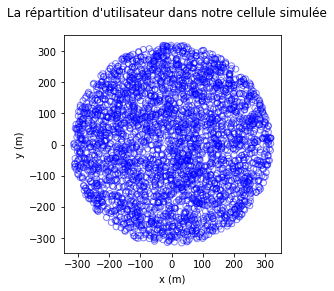

In [1]:
import math
import random
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt

intensityUser = 0.01 # intensit√© de'utilisateurs par unit√© de surface en m^-2
R = 320 # rayon de la cellule en m√®tre
area = (math.pi)* math.pow(R,2)
measure = intensityUser * area
nbUsers = scipy.stats.poisson(measure).rvs()#Poisson number of points

print("Nombre d'utilisateurs tir√© par la loi de Poisson : ",nbUsers)

tabx = []
taby = []

x0 = 0
y0 = 0

for i in range(nbUsers):
    angle = 2*(math.pi)*random.random()
    radius = R*math.sqrt(random.random())
    x = x0 + radius * np.cos(angle)
    y = y0 + radius * np.sin(angle) 
    
    tabx.append(x)
    taby.append(y)

#plot
fig = plt.figure()
fig.suptitle('La r√©partition d\'utilisateur dans notre cellule simul√©e')
plt.scatter(tabx,taby, edgecolor='b', facecolor='none', alpha=0.5 )
plt.xlabel('x (m)')
plt.ylabel('y (m)')
plt.axis('square')
plt.show()

2. Quel est le nombre moyen d‚Äôutilisateurs dans la cellule ?

In [2]:
moyenUser = round(measure)
print("Nombre moyen d'utilisateurs dans la cellule : ",moyenUser)

Nombre moyen d'utilisateurs dans la cellule :  3217


On rappelle que pour simuler un processus de Poisson, il faut dans un premier temps tirer le nombre de points suivant une loi de Poisson, puis simuler la position de chaque point uniform√©ment dans le disque. On pourra utiliser des coordonn√©es polaires pour g√©n√©rer les positions des points, ou utiliser la m√©thode du rejet en simulant sur le carr√© de c√¥t√© $2R$ et en rejetant les points tombant √† l‚Äôext√©rieur du disque.

3. Quel est le processus des utilisateurs actifs √† chaque instant dans la cellule ? et quel est leur nombre moyen ? La probabilit√© pour un utilisateur d‚Äô√™tre actif vaut $p = 0.01$.

Nombre d'utilisateurs actifs dans la cellule :  31
Nombre moyen d'utilisateurs actifs dans la cellule :  32


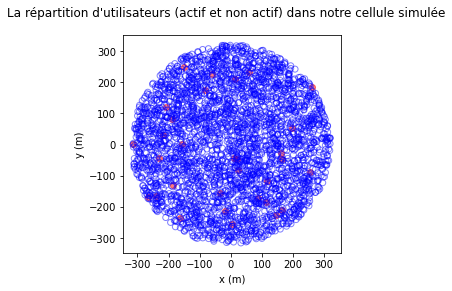

In [3]:
probaActif = 0.01 # probabilit√© pour un utilisateur d‚Äô√™tre actif
measureActif = measure*probaActif
nbUsersActif = scipy.stats.poisson(measureActif).rvs()#Poisson number of points

print("Nombre d'utilisateurs actifs dans la cellule : ",nbUsersActif)
print("Nombre moyen d'utilisateurs actifs dans la cellule : ", round(measureActif))

tabxActif = []
tabyActif = []

x0 = 0
y0 = 0

for i in range(nbUsersActif):
    angle = 2*(math.pi)*random.random()
    radius = R*math.sqrt(random.random())
    x = x0 + radius * np.cos(angle)
    y = y0 + radius * np.sin(angle) 
    
    tabxActif.append(x)
    tabyActif.append(y)

#plot
fig = plt.figure()
fig.suptitle('La r√©partition d\'utilisateurs (actif et non actif) dans notre cellule simul√©e')
plt.scatter(tabxActif,tabyActif, edgecolor='r', facecolor='r', alpha=0.5 )
plt.scatter(tabx,taby, edgecolor='b', facecolor='none', alpha=0.5 )
plt.xlabel('x (m)')
plt.ylabel('y (m)')
plt.axis('square')
plt.show()

A partir de maintenant, on ne consid√®re que le processus des utilisateurs actifs.

4. Calculer $q_{max}$ le nombre maximum de ressources qu‚Äôun utilisateur peut demander. On consid√®re que tous les utilisateurs demandent un d√©bit de C = 162kb/s, et la largeur de bande d‚Äôun resource block est de w = 180kHz. Le  $SNR_{min}$  vaut $0.1$.


In [4]:
C = 162 # d√©bit demand√© en kb/s
w = 180 # largeur de bande d‚Äôun resource block en kHz
SNRmin = 0.1 # rapport signal sur bruit minimum pour que la communication puisse s‚Äô√©tablir

qmax = math.ceil(C/(w*math.log2(1+SNRmin)))# nombre maximum de ressources qu‚Äôun utilisateur peut demander

print("Le nombre maximum de ressources qu‚Äôun utilisateur peut demander est",qmax, ".")

Le nombre maximum de ressources qu‚Äôun utilisateur peut demander est 7 .


### 3.  Probabilit√© d‚ÄôOutage

Le nombre total de ressources demand√©es dans la cellule est : $ F= \sum \limits _{x\in N} q(x)$

On dit qu‚Äôil y a outage lorsque le nombre de ressources demand√©es F est sup√©rieur au nombre de ressources disponibles S. On note $P_S = P(F ‚â• S)$ la probabilit√© d‚Äôoutage quand la cellule dispose de S resource blocks.

5. Estimer $P_S$ pour S allant de $S_{min}$ = 160 √† $S_{max}$  = 180. La probabilit√© $P_S$ s‚Äôestime en comptant le nombre de fois o√π il y a outage sur 10000 simulations. On prend les valeurs num√©riques suivantes : $K = 10^6$ et $\gamma = 2,8$.

In [5]:
def ressource(C,w,K,rx,gamma):
    SNR = K/math.pow(rx,gamma)
    if SNR > SNRmin : 
        res = math.ceil(C/(w*math.log2(1+SNR)))
    else : 
        res = qmax
    return res

In [6]:
nbSimu = 10000
Smin = 160
Smax = 180
K = math.pow(10,6)
gamma = 2.8
freqOutage = np.zeros(22)

for k in range (nbSimu):
    nbUsersActifsimu = scipy.stats.poisson(measureActif).rvs()#Poisson number of points
    tabxActifSimu = []
    tabyActifSimu = []
    x0 = 0
    y0 = 0
    
    for p in range(nbUsersActifsimu):
        angleSimu = 2*(math.pi)*random.random()
        radiusSimu = R*math.sqrt(random.random())
        xSimu = x0 + radiusSimu * np.cos(angleSimu)
        ySimu = y0 + radiusSimu * np.sin(angleSimu) 
        tabxActifSimu.append(xSimu)
        tabyActifSimu.append(ySimu)
    
    for S in range(Smin,Smax+1):
        F = 0
        
        for i in range(nbUsersActifsimu):
            rx = math.dist((0,0),(tabxActifSimu[i],tabyActifSimu[i]))
            F += ressource(C,w,K,rx,gamma)
        if F > S:
            currentIndex = S-160
            freqOutage[currentIndex] += 1

probaOutage = freqOutage/nbSimu

for S in range(Smin,Smax+1):
    print("Probabilit√© d'outage pour S =",S, "vaut", probaOutage[S-160],".")

Probabilit√© d'outage pour 160 vaut 0.0216 .
Probabilit√© d'outage pour 161 vaut 0.0192 .
Probabilit√© d'outage pour 162 vaut 0.0176 .
Probabilit√© d'outage pour 163 vaut 0.0159 .
Probabilit√© d'outage pour 164 vaut 0.0144 .
Probabilit√© d'outage pour 165 vaut 0.0128 .
Probabilit√© d'outage pour 166 vaut 0.0115 .
Probabilit√© d'outage pour 167 vaut 0.0108 .
Probabilit√© d'outage pour 168 vaut 0.0098 .
Probabilit√© d'outage pour 169 vaut 0.0088 .
Probabilit√© d'outage pour 170 vaut 0.0079 .
Probabilit√© d'outage pour 171 vaut 0.007 .
Probabilit√© d'outage pour 172 vaut 0.0062 .
Probabilit√© d'outage pour 173 vaut 0.0057 .
Probabilit√© d'outage pour 174 vaut 0.0052 .
Probabilit√© d'outage pour 175 vaut 0.0044 .
Probabilit√© d'outage pour 176 vaut 0.0043 .
Probabilit√© d'outage pour 177 vaut 0.004 .
Probabilit√© d'outage pour 178 vaut 0.0033 .
Probabilit√© d'outage pour 179 vaut 0.0031 .
Probabilit√© d'outage pour 180 vaut 0.0028 .


6. Combien valent Œ≤ et Œ± tels que $D_xF(N) \leq Œ≤$, et $\int_{Cellule} |D_xF(N)|^2 d\mu(x) \leq Œ±^2 $ pour presque tout point x de la cellule et presque toute r√©alisation N du processus de Poisson des utilisateurs actifs ?

In [7]:
#pg4

lambda1 = intensityUser*probaActif
beta = qmax
alpha = qmax*R*math.sqrt((lambda1*(math.pi)))

print("Œ≤ :",beta)
print("Œ± :",alpha)

Œ≤ : 7
Œ± : 39.70296626028356


7. Combien vaut le nombre moyen de ressources $E[F]$ demand√©es dans la cellule?

In [8]:
def calculrk(k):
    if(k==0):
        rk=0
    elif k == qmax:
        rk = R
    else:
        puiss = C/(k*w)
        rk = math.pow((K/(math.pow(2,puiss)-1)),(1/gamma))
    return rk

In [9]:
somme = 0
for k in range (1, qmax+1):
    somme += (k* (math.pow(calculrk(k),2)- math.pow(calculrk(k-1),2))) 

nbMoyenRes = lambda1*math.pi*somme
print("Le nombre moyen de ressources ùê∏[ùêπ] demand√©es dans la cellule :", nbMoyenRes)

Le nombre moyen de ressources ùê∏[ùêπ] demand√©es dans la cellule : 112.07637130779693


8. V√©rifier que l‚Äôin√©galit√© de concentration est bien v√©rifi√©e dans les r√©sultats de simulation de la question 4.

<center>$P(F \geq E[F]+y)\leq exp[-(\frac{y}{\beta} + \frac{\alpha^2}{\beta^2} )ln(1+\frac{\beta y}{\alpha^2})+ \frac{y}{\beta}]$</center>

In [16]:
def concentration(y):
    res = (math.exp(-((y/beta)+(math.pow(alpha,2)/math.pow(beta,2)))*math.log(1+(beta*y)/(math.pow(alpha,2)))+ (y/beta)))
    return res

for S in range(Smin,Smax+1):
    y = S-nbMoyenRes
    rhs = concentration(y)
    
    if rhs >= probaOutage[S-160]:
        print("L‚Äôin√©galit√© de concentration est bien v√©rifi√©e pour S =",S, "car",probaOutage[S-160],"<=", rhs, ".")
    else:
        print("L‚Äôin√©galit√© de concentration n'est v√©rifi√©e pour S =",S, "car",probaOutage[S-160],">", rhs, ".")

L‚Äôin√©galit√© de concentration est bien v√©rifi√©e pour S = 160 car 0.0216 <= 0.5057588455981579 .
L‚Äôin√©galit√© de concentration est bien v√©rifi√©e pour S = 161 car 0.0192 <= 0.49188026839631366 .
L‚Äôin√©galit√© de concentration est bien v√©rifi√©e pour S = 162 car 0.0176 <= 0.4781332844016018 .
L‚Äôin√©galit√© de concentration est bien v√©rifi√©e pour S = 163 car 0.0159 <= 0.4645292207771427 .
L‚Äôin√©galit√© de concentration est bien v√©rifi√©e pour S = 164 car 0.0144 <= 0.45107878311678107 .
L‚Äôin√©galit√© de concentration est bien v√©rifi√©e pour S = 165 car 0.0128 <= 0.4377920537041002 .
L‚Äôin√©galit√© de concentration est bien v√©rifi√©e pour S = 166 car 0.0115 <= 0.4246784915704095 .
L‚Äôin√©galit√© de concentration est bien v√©rifi√©e pour S = 167 car 0.0108 <= 0.4117469342800955 .
L‚Äôin√©galit√© de concentration est bien v√©rifi√©e pour S = 168 car 0.0098 <= 0.39900560136810553 .
L‚Äôin√©galit√© de concentration est bien v√©rifi√©e pour S = 169 car 0.0088 <= 0.386462

9. On cherche √† dimensionner la cellule avec l‚Äôin√©galit√© de concentration : d√©terminer le nombre de ressources S n√©cessaires pour avoir le majorant de la probabilit√© d‚Äôoutage $P_S$ inf√©rieur √† 0.01.

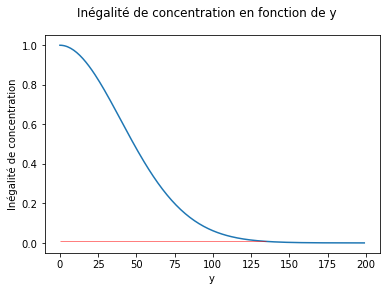

D'apr√®s la courbe ci-dessus, le majorant du seuil se situe entre 125 et 135.


In [67]:
inegalites = []

for ytest in range (0,200):
    inegalites.append(concentration(ytest))
    
#plot
fig = plt.figure()
fig.suptitle('In√©galit√© de concentration en fonction de y')
plt.plot(inegalites)
plt.hlines(y=0.01, xmin=0, xmax=135, linewidth=0.5, color='r')
plt.xlabel('y')
plt.ylabel('In√©galit√© de concentration')
plt.show()
print("D'apr√®s la courbe ci-dessus, le majorant du seuil se situe entre 125 et 135.")

In [60]:
seuil = 0.01
yfinal = 0
diffnew = 1

for ytest in range (125,135):
    diff = seuil - concentration(ytest)
    if diff >= 0 and diff < diffnew:
        diffnew = diff
        yfinal = ytest

S_majorant = yfinal+nbMoyenRes
print("Il faut S =",str(round(S_majorant)), "pour avoir une in√©galit√© de concentration inf√©rieur √†", str(round(concentration(yfinal),2)),".")

Il faut S = 243 pour avoir une in√©galit√© de concentration inf√©rieur √† 0.01 .


10. On consid√®re le dimensionnement S obtenu √† la question pr√©c√©dente. Que vaut alors la probabilit√© d‚Äôoutage $P_s$ ?

In [64]:
nbSimu = 10000
K = math.pow(10,6)
gamma = 2.8
freqOutage_majorant = 0

for k in range (nbSimu):
    nbUsersActifsimu_majorant = scipy.stats.poisson(measureActif).rvs()#Poisson number of points
    tabxActifSimu_majorant = []
    tabyActifSimu_majorant = []
    x0_majorant = 0
    y0_majorant = 0
    
    for p in range(nbUsersActifsimu_majorant):
        angleSimu_majorant = 2*(math.pi)*random.random()
        radiusSimu_majorant = R*math.sqrt(random.random())
        xSimu_majorant = x0 + radiusSimu_majorant * np.cos(angleSimu_majorant)
        ySimu_majorant = y0 + radiusSimu_majorant * np.sin(angleSimu_majorant) 
        tabxActifSimu_majorant.append(xSimu_majorant)
        tabyActifSimu_majorant.append(ySimu_majorant)
    
    F_majorant = 0
        
    for i in range(nbUsersActifsimu_majorant):
        rx_majorant = math.dist((0,0),(tabxActifSimu_majorant[i],tabyActifSimu_majorant[i]))
        F_majorant += ressource(C,w,K,rx_majorant,gamma)
    if F_majorant > S_majorant:
        freqOutage_majorant += 1

probaOutage_majorant = freqOutage_majorant/nbSimu

print("Probabilit√© d'outage pour S =",round(S_majorant), "vaut", probaOutage_majorant,".")

Probabilit√© d'outage pour S = 243 vaut 0.0 .


11. Toujours en utilisant le m√™me dimensionnement S, calculer la probabilit√© d‚Äôoutage dans le cas o√π $Œª$ varie de 10%, puis de 20%, puis si c‚Äôest $\gamma$ qui varie de 2%, puis de 5%.

In [69]:
nbSimu = 10000
K = math.pow(10,6)
gamma = 2.8
freqOutage1 = 0

percentage_lambda = [0.1,0.2]

for m in range (2):
    
        intensityUser1 = 0.01*percentage_lambda[m]# intensit√© de'utilisateurs par unit√© de surface en m^-2
        R = 320 # rayon de la cellule en m√®tre
        area = (math.pi)* math.pow(R,2)
        measure1 = intensityUser1 * area
        probaActif1 = 0.01 # probabilit√© pour un utilisateur d‚Äô√™tre actif
        measureActif1 = measure1*probaActif1
        
        for k in range (nbSimu):
            nbUsersActif1 = scipy.stats.poisson(measureActif1).rvs()#Poisson number of points
            tabxActif1 = []
            tabyActif1 = []
            x0 = 0
            y0 = 0
            
            for i in range(nbUsersActif1):
                angle1 = 2*(math.pi)*random.random()
                radius1 = R*math.sqrt(random.random())
                x1 = x0 + radius1 * np.cos(angle1)
                y1 = y0 + radius1 * np.sin(angle1) 
                tabxActif1.append(x1)
                tabyActif1.append(y1)
                
            F1 = 0
            
            for i in range(nbUsersActif1):
                rx1 = math.dist((0,0),(tabxActif1[i],tabyActif1[i]))
                F1 += ressource(C,w,K,rx1,gamma)
                
            if F1 > S_majorant:
                freqOutage1 += 1
        
        probaOutage1 = freqOutage1/nbSimu
        print("Œª = ",percentage_lambda[m], "Probabilit√© d'outage pour S =",round(S_majorant), "vaut", probaOutage1,".")

Œª =  0.1 Probabilit√© d'outage pour S = 243 vaut 0.0 .
Œª =  0.2 Probabilit√© d'outage pour S = 243 vaut 0.0 .


In [70]:
nbSimu = 10000
K = math.pow(10,6)
gamma = 2.8
freqOutage2 = 0

percentage_gamma = [0.02,0.05]

for n in range (2):
    
        intensityUser2 = 0.01# intensit√© de'utilisateurs par unit√© de surface en m^-2
        R = 320 # rayon de la cellule en m√®tre
        area = (math.pi)* math.pow(R,2)
        measure2= intensityUser2 * area
        probaActif2 = 0.01 # probabilit√© pour un utilisateur d‚Äô√™tre actif
        measureActif2 = measure1*probaActif2
        
        for k in range (nbSimu):
            nbUsersActif2 = scipy.stats.poisson(measureActif2).rvs()#Poisson number of points
            tabxActif2 = []
            tabyActif2 = []
            x0 = 0
            y0 = 0
            
            for i in range(nbUsersActif2):
                angle2 = 2*(math.pi)*random.random()
                radius2 = R*math.sqrt(random.random())
                x2 = x0 + radius2 * np.cos(angle2)
                y2 = y0 + radius2 * np.sin(angle2) 
                tabxActif2.append(x2)
                tabyActif2.append(y2)
                
            F2 = 0
            
            for i in range(nbUsersActif2):
                rx2 = math.dist((0,0),(tabxActif2[i],tabyActif2[i]))
                F2 += ressource(C,w,K,rx2,gamma*percentage_gamma[n])
                
            if F2 > S_majorant:
                freqOutage2 += 1
        
        probaOutage2= freqOutage2/nbSimu
        print("ùõæ = ",percentage_gamma[n], "Probabilit√© d'outage pour S =",round(S_majorant), "vaut", probaOutage2,".")

ùõæ =  0.02 Probabilit√© d'outage pour S = 243 vaut 0.0 .
ùõæ =  0.05 Probabilit√© d'outage pour S = 243 vaut 0.0 .


12. Que dire alors du dimensionnement S obtenu gr√¢ce √† l‚Äôin√©galit√© de concentration √† la question 8. ?

### 4. Introduction du fading  
On suppose maintenant que l‚Äôon prend en compte le fading de Rayleigh. Cela signifie que le nombre de ressources demand√©es par un utilisateur en position $x$ devient

<center>$q(x)=min(q_{max}, \lceil \frac{C}{wlog_2(1+ \frac{Km_x}{r(x)^\gamma})} \rceil)$ si $\frac{Km_x} {r(x)^\gamma}>SNR_{min}$,
</center>

o√π $m_x$ est le coefficient du fading de Rayleigh. On suppose g√©n√©ralement que
* $m_x$ et $m_y$ sont des variables al√©atoires ind√©pendantes si $x$ et $y$ sont diff√©rents, 
* pour tout $x ‚àà R2$, $m_x$ suit une loi exponentielle de param√®tre 1 : $P(m_x >t) = e^{‚àít}$.

Le mod√®le est donc maintenant un processus ponctuel marqu√© o√π les r√©alisations sont de la forme $ N^{'}= \sum \limits _{x\in N} \delta_{x,m_x}$ 

avec $m=\int_{R^+}e^{-t}dt$.

Du point de vue de la mod√©lisation, cela signifie qu‚Äô√† chaque point du processus de
Poisson, on ajoute une marque repr√©sentant le fading de Rayleigh de cet utilisateur. Pour chaque point du processus de Poisson tir√©, il faut alors tirer une variable al√©atoire suivant une loi exponentielle de param√®tre 1. Attention √† v√©rifier que le nombre de ressources demand√©es par un utilisateur ne d√©passe pas $q_max$.

13. Calculer $P_S$ pour S allant de $S_{min} = 195$ √† $S_{max} = 215$.

14. Combien vaut le nombre de ressources moyen demand√©es $E[F]$? On rappelle que la fonction Gamma est d√©finie par 

<center>$\Gamma(z) = \int \limits _{0}^{\infty} e^{-t}t^{z-1}dt$<center>

15. Calculer le dimensionnement S n√©cessaire pour avoir le majorant par in√©galit√© de concentration de la probabilit√© d‚Äôoutage inf√©rieur √† 0.01.

16. En consid√©rant le dimensionnement pr√©c√©dent, calculer par simulation la probabilit√© d‚Äôoutage pour $Œª$ et $Œ≥$ inchang√©s.

17. Toujours en consid√©rant le dimensionnement pr√©c√©dent, calculer la probabilit√© d‚Äôoutage dans le cas o√π $Œª$ varie de 10%, puis de 20%, puis si c‚Äôest $Œ≥$ qui varie de 2%, puis de 5%.

18. Que pouvez-vous dire du dimensionnement S ?

***